In [245]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import make_column_transformer, make_column_selector
import numpy as np

In [197]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [198]:
X,y = df.drop('left', axis=1) , df['left']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=24, stratify=y)
X_train.shape


(10496, 9)

# Preprocessing

In [200]:
ohe = OneHotEncoder(sparse_output=False, drop = 'first', handle_unknown='error').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)) , 
                             ('passthrough', make_column_selector(dtype_exclude=object)) ,
                             verbose_feature_names_out=False).set_output(transform='pandas')

In [201]:
#Data transformed 
X_trn = ct.fit_transform(X_train)
X_tst = ct.transform(X_test)


In [202]:
n_features = [3,5,8,10]
scores = []

for i in tqdm(range(len(n_features))):
    rf = RandomForestClassifier(n_estimators=20 , max_features=n_features[i])
    rf.fit(X_trn , Y_train)
    y_pred = rf.predict(X_tst)
    #scores.append(accuracy_score(Y_test , y_pred ))
    scores.append(f1_score(Y_test , y_pred , pos_label=1 ))

print(scores)
i_max = np.argmax(scores)
print('n_feature of max F1 Score ' , n_features[i_max])
print('Max F1 Score is ' , scores[i_max])



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.99it/s]

[0.9713740458015268, 0.9748218527315915, 0.9728442115292997, 0.9762131303520457]
n_feature of max F1 Score  10
Max F1 Score is  0.9762131303520457


In [203]:
rf = RandomForestClassifier(n_estimators=20 , max_features=10)
rf.fit(X_trn , Y_train)
y_pred = rf.predict(X_tst)
#scores.append(accuracy_score(Y_test , y_pred ))
print(f1_score(Y_test , y_pred , pos_label=1 ))

0.9737970462124821


In [204]:
rf.feature_names_in_

array(['Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'], dtype=object)

In [205]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_trn.columns

importance_df = pd.DataFrame({'Importances': importances , 'Features': feature_names})
importance_df = importance_df.sort_values('Importances', ascending = False)

In [206]:
importance_df

,Importances,Features
11,0.436103,satisfaction_level
15,0.179287,time_spend_company
13,0.134738,number_project
14,0.118030,average_montly_hours
12,0.109833,last_evaluation
9,0.003668,salary_low
8,0.003262,Department_technical
10,0.003155,salary_medium
6,0.002999,Department_sales
16,0.002255,Work_accident


Text(0, 0.5, 'Importance')

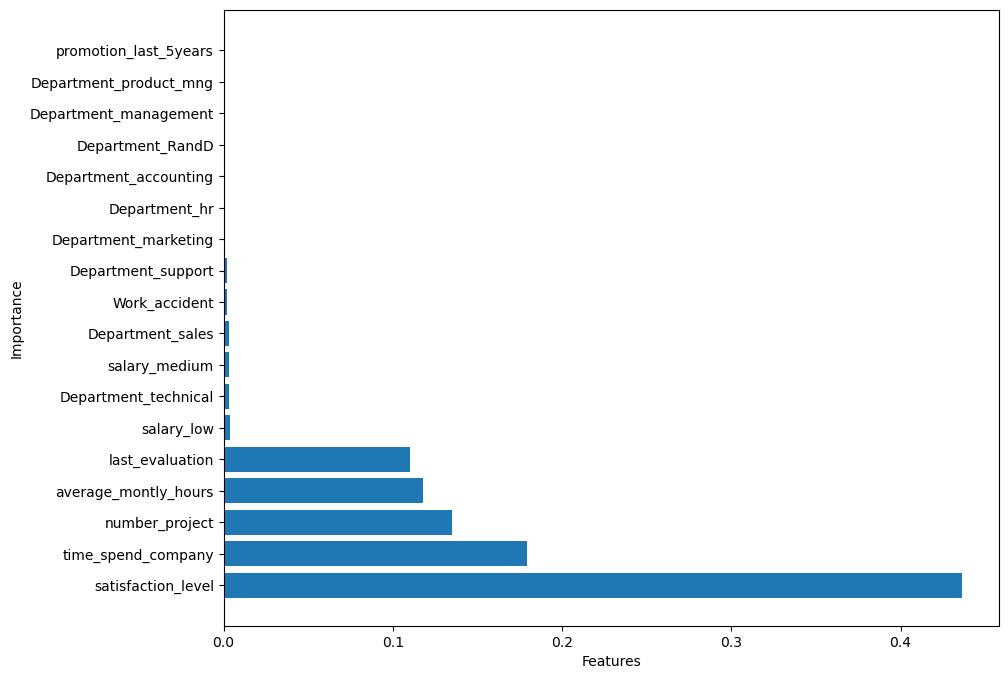

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(importance_df['Features'] , importance_df['Importances'])
plt.xlabel('Features')
plt.ylabel('Importance')

# With Insurance Dataset

In [263]:
df = pd.read_csv('Insurance.csv')

In [265]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [267]:
X, y = df.drop('charges', axis = 1) , df['charges']

In [269]:
X_dumm = pd.get_dummies(X, drop_first=True)

In [271]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dumm,y,test_size=0.3, random_state=24)

In [277]:
features = [3,5,6,7]
scores = []

for i in tqdm(range(len(features))):
    rf = RandomForestRegressor(n_estimators=20, max_features=features[i])
    rf.fit(X_train,Y_train)
    y_pred = rf.predict(X_test)
    scores.append([features[i],r2_score(Y_test,y_pred)])
print(scores)

df1 = pd.DataFrame(scores, columns = ['features','r2_score'])
df1.sort_values('r2_score', ascending = False).iloc[0]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.06it/s]


[[3, 0.8532001925559849], [5, 0.8634975302391825], [6, 0.8586038172309325], [7, 0.8623949010925152]]


features    5.000000
r2_score    0.863498
Name: 1, dtype: float64